# Example Notebook

## General Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sid2re.driftgenerator.concept.drift_behaviours import GradualDriftBehaviour, SuddenDriftBehaviour
from sid2re.driftgenerator.generator import DataGeneratorGraph

## Large Scale Functionality Display

,time_idx,feature_1,feature_2,target
0,0.0,4.235794,31.340189,4.997941e+02
1,1.0,-4.560974,40.907740,-3.565373e+02
2,2.0,32.860554,44.507407,-4.007997e+03
3,3.0,91.124906,60.318760,-1.337041e+05
4,4.0,80.612349,31.789792,-6.452094e+04
...,...,...,...,...
495,495.0,-81.257865,36.483852,-3.815195e+06
496,496.0,58.469381,37.602589,1.938584e+06
497,497.0,12.589665,60.064634,8.494666e+03
498,498.0,65.652030,33.386509,1.589735e+06


<Figure size 1200x600 with 0 Axes>

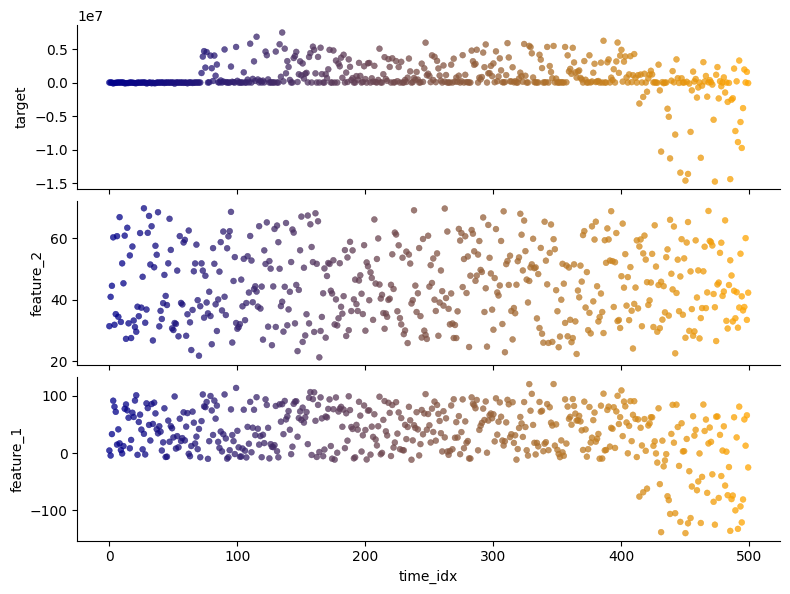

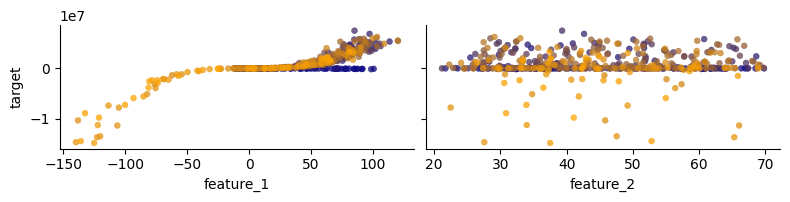

In [2]:
# Initialize the data generator
data_generator = DataGeneratorGraph(
    number_of_data_points=500,
    number_of_features=np.array([2]),
    root_distros=[2, 0, 0, 0],
    number_of_outputs=1,
    feature_min=-100.0,
    feature_max=100.0,
    number_of_models=3,
    noise_var=0.1,
    rand_seed=4,
    concept_drifts=2,
    data_drifts=1,
    concept_drift_class=GradualDriftBehaviour,
    data_drift_class=SuddenDriftBehaviour,
    continuous_time=True,
    drift_blocking_mode=False,
    max_severity=0.8,
    min_severity=0.2,
    number_of_dependency_models=2,
    min_number_dependencies=2,
    max_number_dependencies=3,
    level_limited=True,
    limit_target_dep=True,
    n_target_dep=1,
)

# Generate data
data = data_generator.get_data()
data = data.rename(columns={"0_0": "feature_1", "0_1": "feature_2", "O_0": "target"})
# Get concept information
concept_info, data_drift_info = data_generator.get_shift_information()
display(data)
time_stamps = data["time_idx"].values
# Plot the generated data
plt.figure(figsize=(12, 6))
plot = sns.pairplot(
    data, height=2, aspect=4,
    plot_kws=dict(
        hue=time_stamps, palette="blend:darkblue,orange", edgecolor=None,
        size=0.1, alpha=0.75
    ),
    diag_kind='kde', x_vars=["time_idx"], y_vars=["target", "feature_2", "feature_1"]
)
plot = sns.pairplot(
    data, height=2, aspect=2,
    plot_kws=dict(
        hue=time_stamps, palette="blend:darkblue,orange", edgecolor=None,
        size=0.1, alpha=0.75
    ),
    diag_kind='kde', x_vars=["feature_1", "feature_2"], y_vars=["target"]
)



# README.md Examples

In [3]:
def plot_data(data):
    data = data.rename(columns={"0_0": "feature_1", "0_1": "feature_2", "O_0": "target"})
    # Get concept information
    time_stamps = data["time_idx"].values
    # Plot the generated data
    plot = sns.pairplot(
        data, height=2, aspect=4,
        plot_kws=dict(
            hue=time_stamps, palette="blend:darkblue,orange", edgecolor=None,
            size=0.1, alpha=0.75
        ),
        diag_kind='kde', x_vars=["time_idx"], y_vars=["target", "feature_2", "feature_1"]
    )
    fig = plot.fig
    fig.savefig("Example_3_1")
    plot = sns.pairplot(
        data, height=2, aspect=2,
        plot_kws=dict(
            hue=time_stamps, palette="blend:darkblue,orange", edgecolor=None,
            size=0.1, alpha=0.75
        ),
        diag_kind='kde', x_vars=["feature_1", "feature_2"], y_vars=["target"]
    )
    fig = plot.fig
    fig.savefig("Example_3_2")

## Simple 2D Dataset: Uniform Features without Drifts

C:\Users\ben97726\Git-Reps\KIS\AutoLern\Drift Detection\sid2re\.tox\notebooks\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


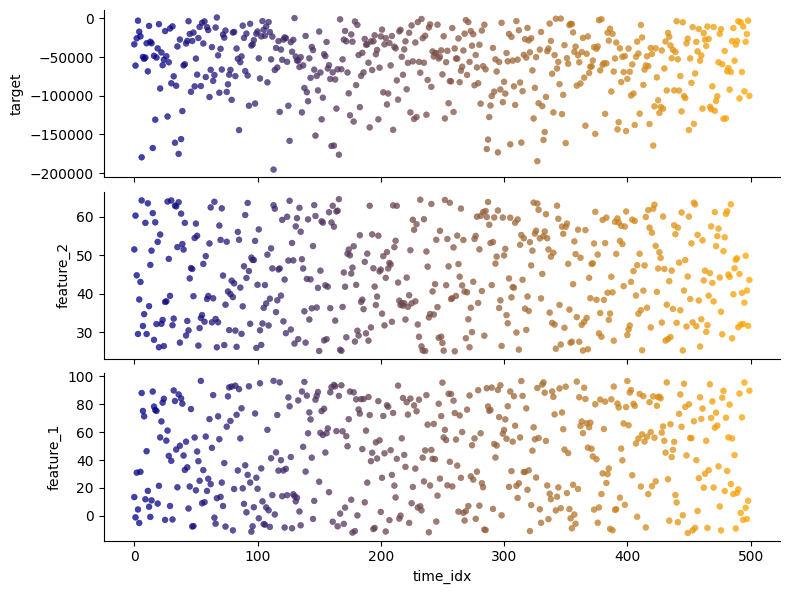

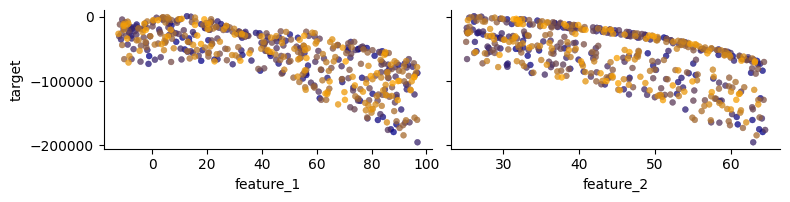

In [4]:
generator = DataGeneratorGraph(
    number_of_features=np.array([2]),
    root_distros=[2, 0, 0, 0],
    number_of_outputs=1,
    n_target_dep=2,
    number_of_data_points=500,
    rand_seed=4
)
# Generate data
data = generator.get_data()
plot_data(data)


## Periodical 2D Dataset (Continous time)

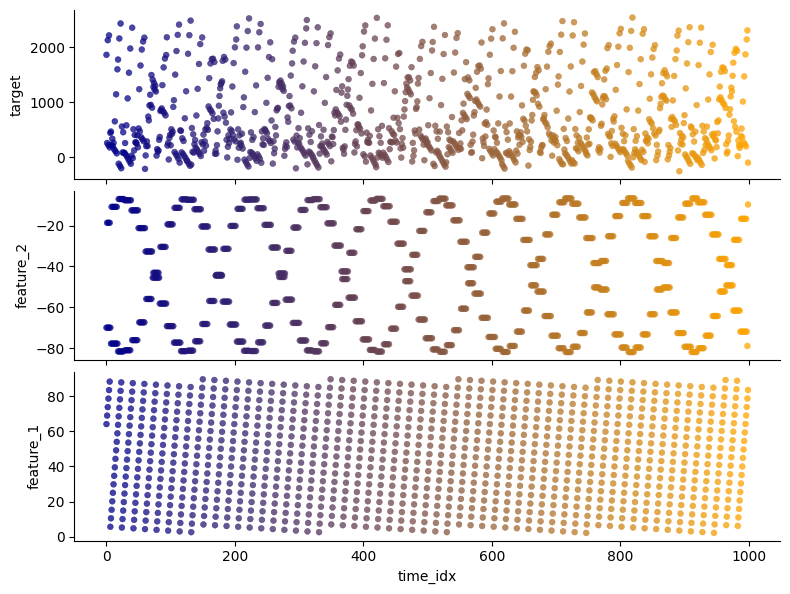

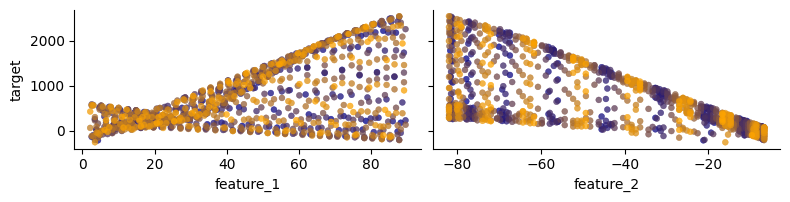

In [5]:
generator = DataGeneratorGraph(
    number_of_features=np.array([2]),
    root_distros=[0, 0, 0, 2],
    number_of_outputs=1,
    n_target_dep=2,
    number_of_data_points=1000,
    continuous_time=True,
    rand_seed=3
)

data = generator.get_data()

plot_data(data)

## Concept Drift 

   time_stamp(centre)      radius  \
0           982.36694  389.675535   

                                               shift          class  
0  [-178.57203028720033, -66.39596106023545, -164...  faulty_sensor  


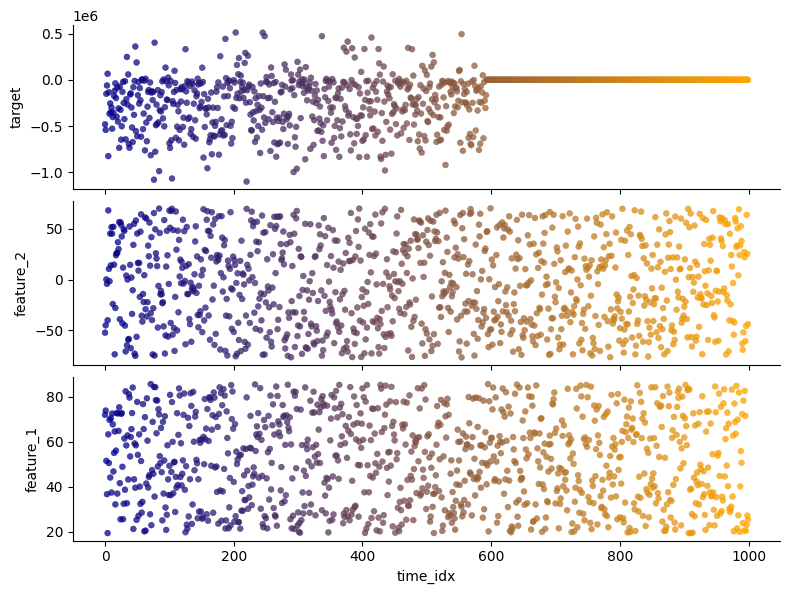

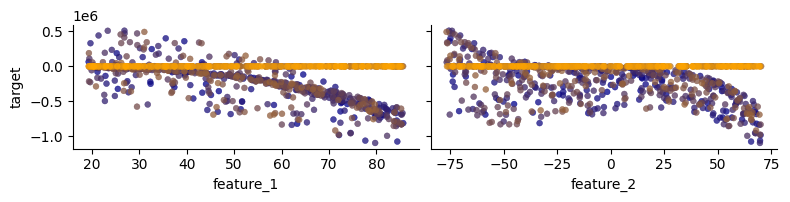

In [6]:
generator = DataGeneratorGraph(
    number_of_features=np.array([2]),
    root_distros=[2, 0, 0, 0],
    number_of_outputs=1,
    n_target_dep=2,
    concept_drifts=1,
    number_of_data_points=1000,
    continuous_time=True,
    rand_seed=6
)

data = generator.get_data()
concept_info, data_drift_info = generator.get_shift_information()
print(concept_info)
plot_data(data)